# Modules

In [ ]:
import sys
sys.path.insert(1, "../module")
import numpy as np      
import snflics
from skimage.transform import resize
from netCDF4 import Dataset                             
from scipy.ndimage import zoom
from matplotlib.patches import Rectangle                
import cartopy.crs as ccrs                              
import cartopy.feature as cfeature                   
import matplotlib.pyplot as plt                         
plt.style.use('default')                               
plt.rcParams['figure.facecolor'] = 'white'
import warnings
warnings.filterwarnings("ignore")
import cartopy.io.shapereader as shpreader

In [66]:
y_min, y_max = 1403, 1914
x_min, x_max = 66, 577

In [67]:
# lat and lon meshgrids
geodata = np.load("/gws/nopw/j04/cocoon/SSA_domain/lat_lon_2268_2080.npz")
lons = geodata["lon"][y_min:y_max+1, x_min:x_max+1]
lats = geodata["lat"][y_min:y_max+1, x_min:x_max+1]

# Dakar lat lon
Dakar_lon = -17.467686
Dakar_lat = 14.716677

# Core data 

In [68]:
lats.shape

(512, 512)

In [69]:
year = "2020"
month = "07"
day = "14"
hour = "22"
minute = "00"

In [70]:
path_core = f'/gws/nopw/j04/cocoon/SSA_domain/ch9_wavelet/{year}/{month}'

In [71]:
# file of interest at time t0
file = f'{path_core}/{year}{month}{day}{hour}{minute}.nc'

data = Dataset(file, mode='r')

# wavelet power maxima's coordinates
x0_lat = data["max_lat"][:]
x0_lon = data["max_lon"][:]

# cloud top temperature and wavelet power arrays
temp = data["tir"][0, y_min:y_max+1, x_min:x_max+1]
cores = data["cores"][0, y_min:y_max+1, x_min:x_max+1]
binary_cores = (cores != 0).astype(int)

# Plot Dakar Context Domain with Core Data

In [72]:
cores.shape

(512, 512)

top = 19.99001

bottom = -2.018712

left = -23.0

right = 32.021806

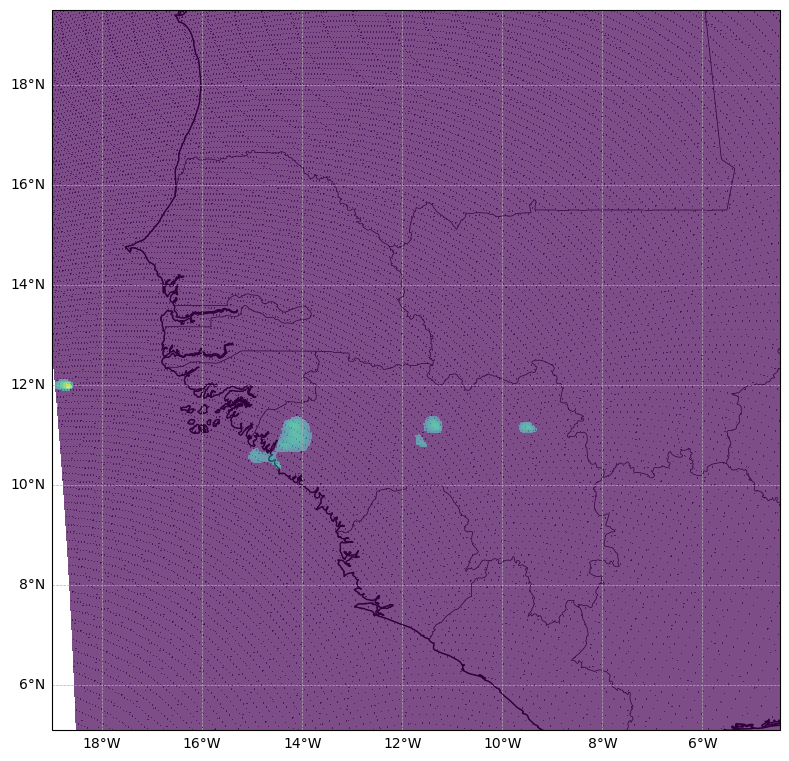

In [81]:
# Create figure and axis
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

western_sahel_lat_min = 5.1
western_sahel_lat_max = 19.5
western_sahel_lon_min = -19
western_sahel_lon_max = -4.45

extent = (
    western_sahel_lon_min,
    western_sahel_lon_max,
    western_sahel_lat_min,
    western_sahel_lat_max,
)

ax.set_extent(extent, crs=ccrs.PlateCarree())


# Base features
ax.add_feature(cfeature.LAND, facecolor='none', edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, facecolor='none', zorder=0)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5, zorder=1)
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5, zorder=1)

# Load Natural Earth country boundaries
shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

# Gridlines
gl = ax.gridlines(draw_labels=True, alpha=1, linestyle='--', linewidth=0.5)
gl.top_labels = False
gl.right_labels = False

contour_core = ax.pcolormesh(
    lons, lats, cores,
    transform=ccrs.PlateCarree(),
    alpha=0.7,
    zorder=2
)
plt.tight_layout()
plt.show()
